# Exploratory Data Analysis (EDA)

This notebook provides a step-by-step exploratory data analysis (EDA) workflow for a dataset. Follow each section to understand the structure, quality, and relationships within your data.

## 1. Import Required Libraries

Import the essential libraries for data manipulation and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles
sns.set(style="whitegrid")
%matplotlib inline

## 2. Load the Dataset

Load your dataset into a pandas DataFrame. Replace `'your_dataset.csv'` with your actual file path.

In [2]:
# Load the dataset
df = pd.read_csv('/Users/jadon/Desktop/study_shorts/ML/loan-default-prediction/data/Dataset.csv')

# Display the shape of the dataset
print(f"Dataset shape: {df.shape}")

Dataset shape: (121856, 40)


/var/folders/8s/p71s8zhj6zx29_00xl1vhzs80000gn/T/ipykernel_4813/1294205605.py:2: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/jadon/Desktop/study_shorts/ML/loan-default-prediction/data/Dataset.csv')


## 3. Inspect Data Structure

Preview the data, check its dimensions, column names, and data types.

In [3]:
# Display the first five rows
display(df.head())

# Show column names and data types
print("\nColumn Names and Data Types:")
print(df.dtypes)

# Show the shape of the DataFrame
print(f"\nNumber of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0



Column Names and Data Types:
ID                              int64
Client_Income                  object
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                  object
Loan_Annuity                   object
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative     object
Age_Days                       object
Employed_Days                  object
Registration_Days              object
ID_Days                        object
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation   

## 4. Check for Missing Values

Identify missing values in the dataset and visualize them if necessary.

Missing values per column:
ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
C

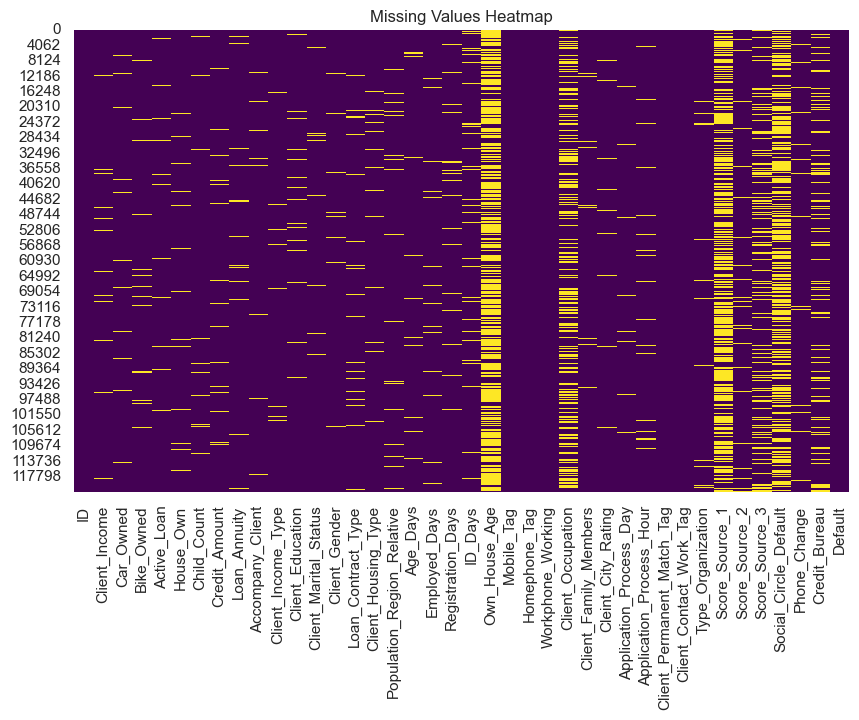

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Handling Missing Values

In [5]:
print("Missing values before imputation:")
print(df.isnull().sum())
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in [np.float64, np.int64]:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values before imputation:
ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members         

/var/folders/8s/p71s8zhj6zx29_00xl1vhzs80000gn/T/ipykernel_4813/2582972595.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/var/folders/8s/p71s8zhj6zx29_00xl1vhzs80000gn/T/ipykernel_4813/2582972595.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

# Outlier Detection using IQR

In [ ]:
# Outlier Detection using IQR and Class Imbalance Check
numerical_cols = df.select_dtypes(include=[np.number]).columns
print("Outlier counts per numerical column:")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"{col}: {outliers} outliers")

# Class imbalance check
# (Place this after outlier detection, not inside the loop)
target_col = 'Default'  # Use the actual target column name
if target_col in df.columns:
    print("Class distribution in target variable:")
    print(df[target_col].value_counts(normalize=True))

Outlier counts per numerical column:
ID: 0 outliers
Car_Owned: 0 outliers
Bike_Owned: 0 outliers
Active_Loan: 0 outliers
House_Own: 0 outliers
Child_Count: 1659 outliers
Own_House_Age: 39708 outliers
Mobile_Tag: 1 outliers
Homephone_Tag: 24432 outliers
Workphone_Working: 0 outliers
Client_Family_Members: 1564 outliers
Cleint_City_Rating: 30498 outliers
Application_Process_Day: 0 outliers
Application_Process_Hour: 917 outliers
Score_Source_1: 53020 outliers
Score_Source_2: 624 outliers
Social_Circle_Default: 59814 outliers
Phone_Change: 260 outliers
Credit_Bureau: 2724 outliers
Default: 9845 outliers
Class distribution in target variable:
Default
0    0.919208
1    0.080792
Name: proportion, dtype: float64


## 5. Summary Statistics

Generate descriptive statistics for numerical and categorical columns.

In [33]:
# Summary statistics for numerical columns
print("Numerical Features Summary:")
display(df.describe())

# Summary statistics for categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())

Numerical Features Summary:


,ID,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,1.218560e+05,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,41761.000000,121856.000000,121856.000000,121856.000000,119446.000000,119447.000000,119428.000000,118193.000000,53021.000000,116170.000000,59928.000000,118192.000000,103316.000000,121856.000000
mean,1.216093e+07,0.342854,0.332262,0.499175,0.692060,0.417779,12.157324,0.999992,0.200499,0.281201,2.154329,2.030038,3.159736,12.063100,0.501213,0.518625,0.117428,962.106056,1.891082,0.080792
std,3.517694e+04,0.474665,0.471026,0.500001,0.461644,0.728802,12.056079,0.002865,0.400375,0.449587,0.912686,0.504407,1.759045,3.280695,0.211204,0.740248,0.107974,827.976726,1.861921,0.272517
min,1.210000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.014568,0.000005,0.000000,0.000000,0.000000,0.000000
25%,1.213046e+07,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.333481,0.390164,0.057700,272.000000,0.000000,0.000000
50%,1.216093e+07,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.504657,0.564978,0.088700,755.000000,1.000000,0.000000
75%,1.219139e+07,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.673890,0.664011,0.148500,1570.000000,3.000000,0.000000
max,1.222186e+07,1.000000,1.000000,1.000000,1.000000,19.000000,69.000000,1.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,0.945741,100.000000,1.000000,4185.000000,22.000000,1.000000



Value counts for 'Client_Income':
Client_Income
13500       11908
11250       10302
15750        8719
18000        8215
9000         7577
            ...  
13005.0         1
11835.0         1
25026.3         1
12285.0         1
12840.75        1
Name: count, Length: 1516, dtype: int64

Value counts for 'Credit_Amount':
Credit_Amount
45000.0      2513
67500.0      2340
22500.0      2090
27000.0      1865
18000.0      1847
             ... 
126149.85       1
41040           1
201213.9        1
71174.7         1
135534.6        1
Name: count, Length: 6816, dtype: int64

Value counts for 'Loan_Annuity':
Loan_Annuity
900        1885
1350       1684
675         682
1012.5      622
3780        504
           ... 
6178.95       1
1148.4        1
2736.9        1
1109.7        1
2989.35       1
Name: count, Length: 16680, dtype: int64

Value counts for 'Accompany_Client':
Accompany_Client
Alone       97409
Relative    15748
Partner      4516
Kids         1334
Others        987
Group         104

## 6. Visualize Distributions of Numerical Features

Plot histograms and boxplots for numerical features to understand their distributions.

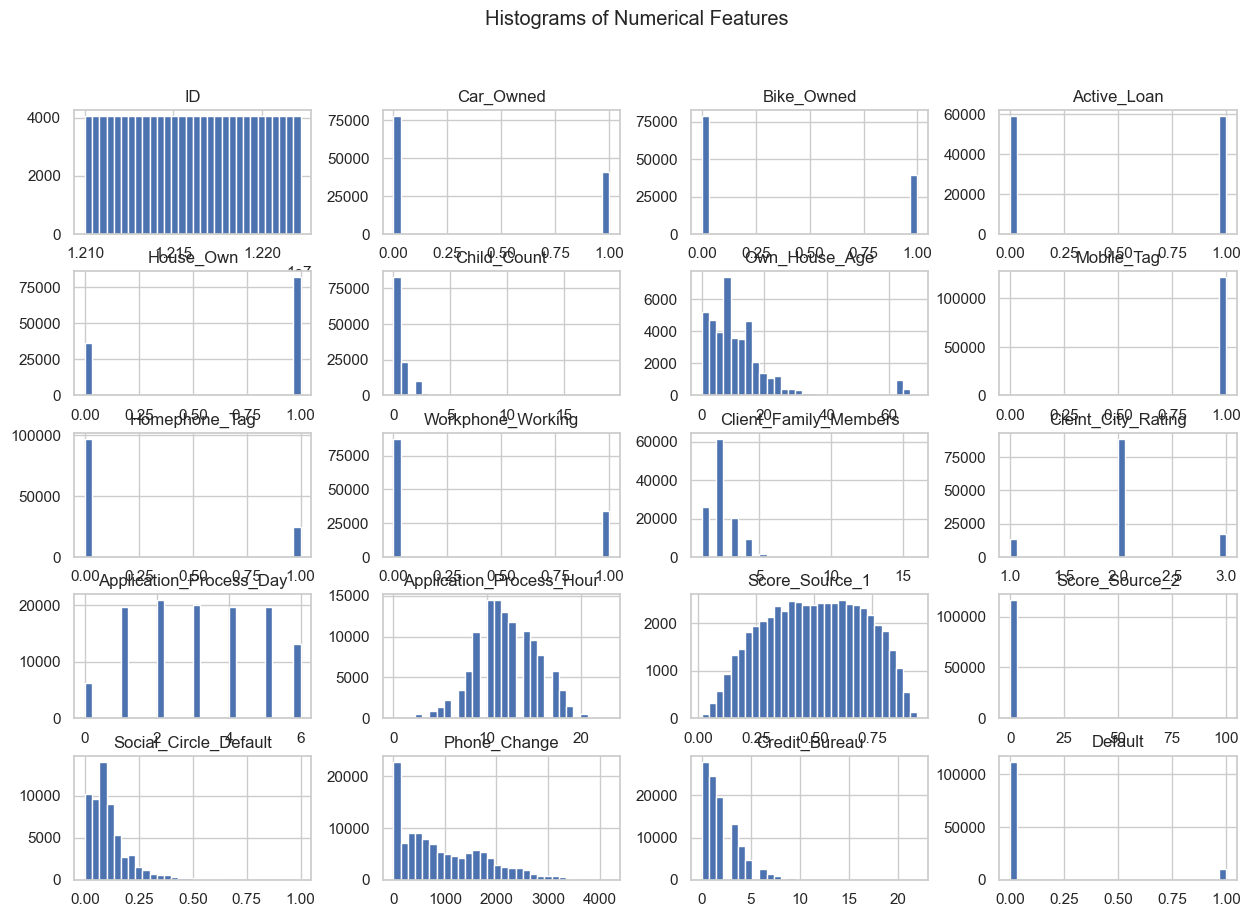

<Figure size 1500x600 with 0 Axes>

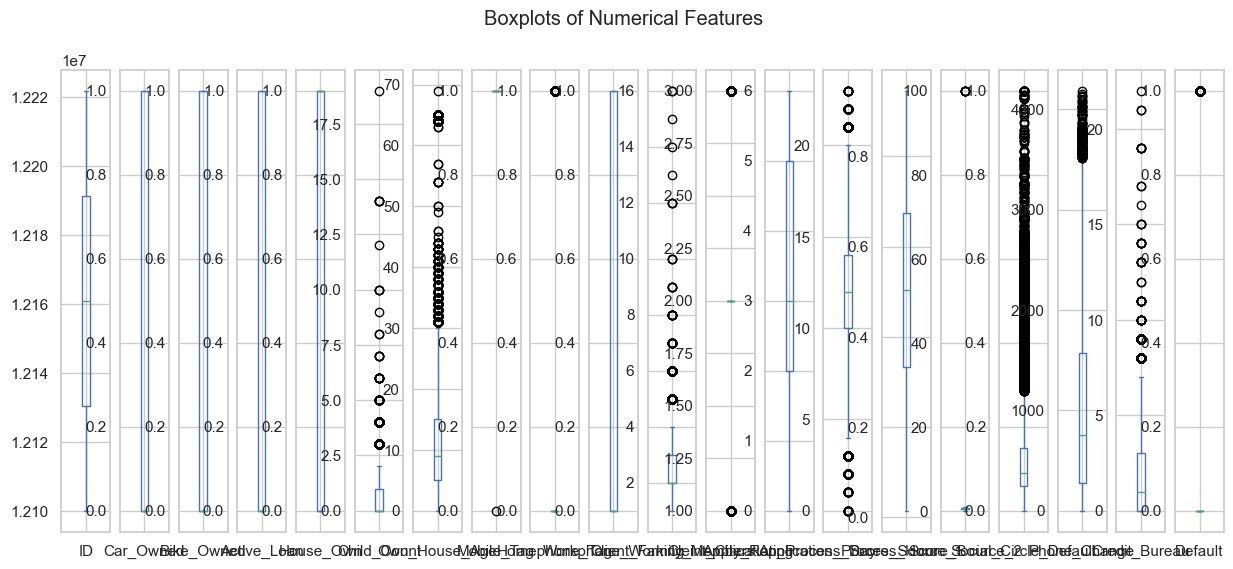

In [34]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Histograms
df[numerical_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Boxplots
plt.figure(figsize=(15, 6))
df[numerical_cols].plot(kind='box', subplots=True, layout=(1, len(numerical_cols)), figsize=(15, 6), sharey=False)
plt.suptitle('Boxplots of Numerical Features')
plt.show()

## 7. Visualize Categorical Feature Counts

Create bar plots to show the frequency of each category in categorical features.

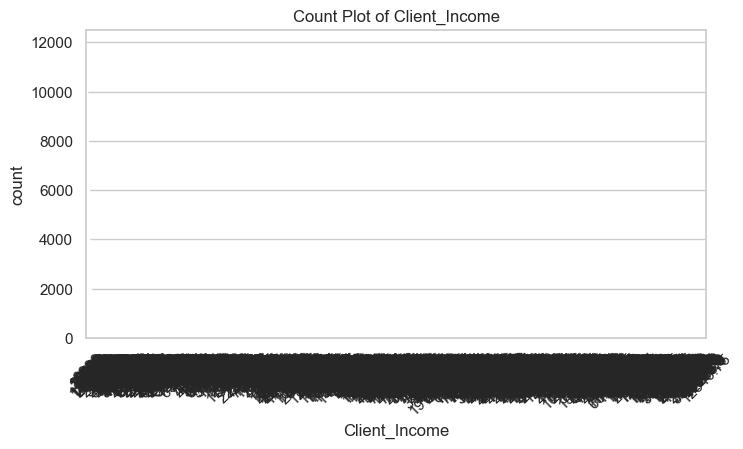

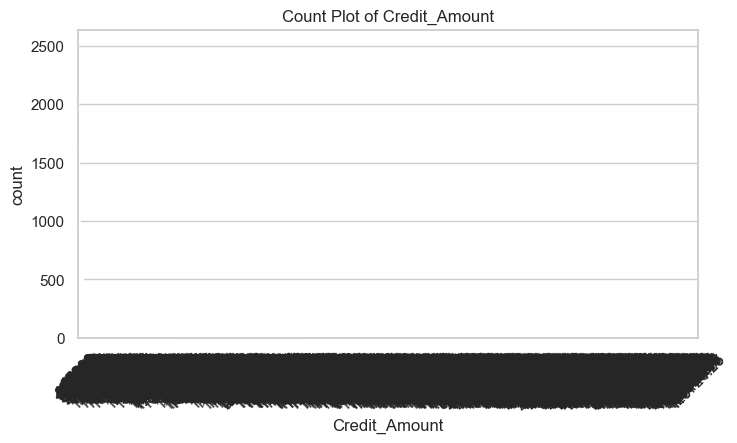

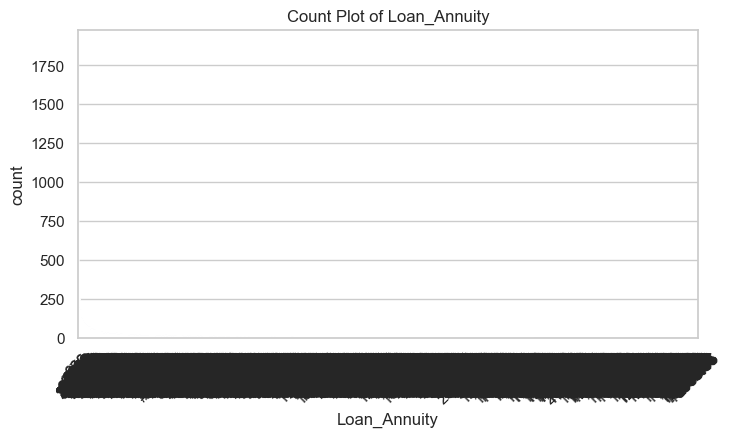

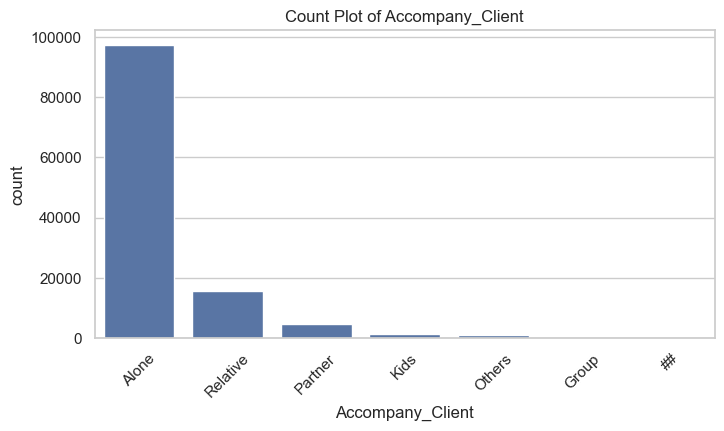

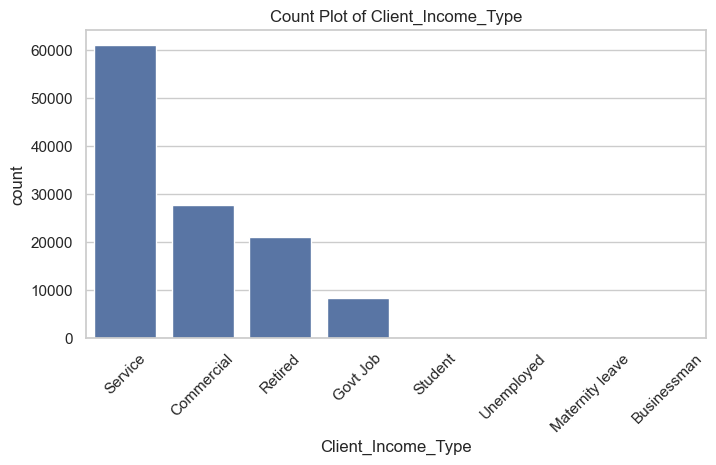

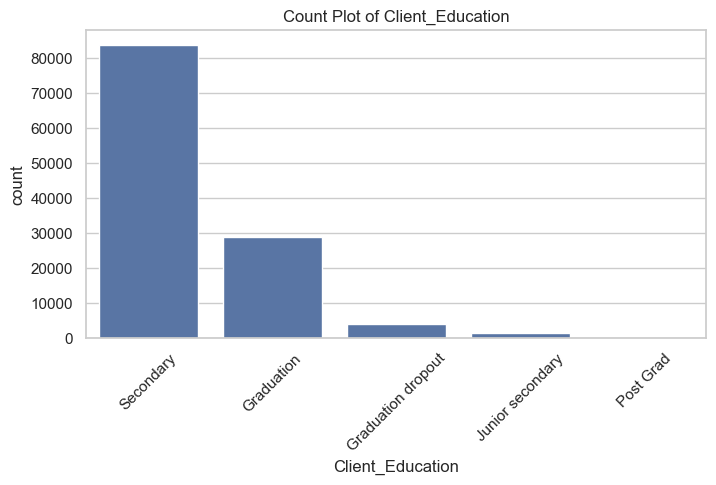

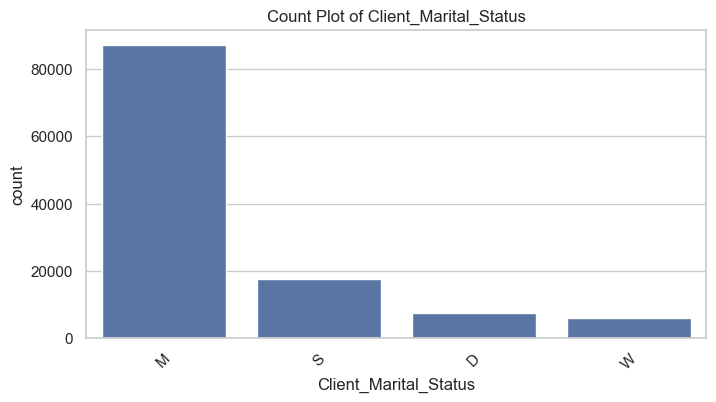

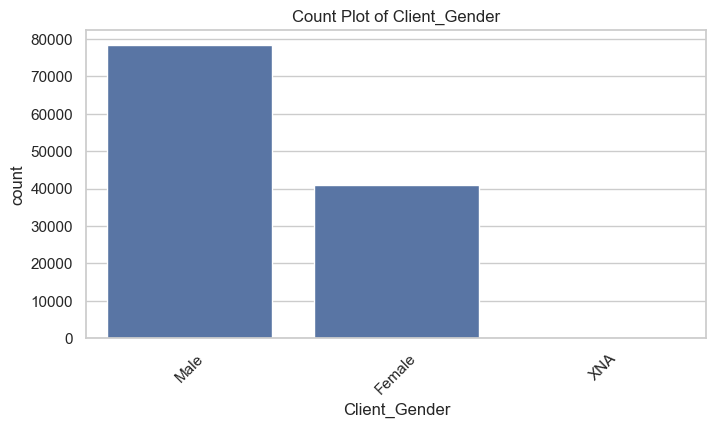

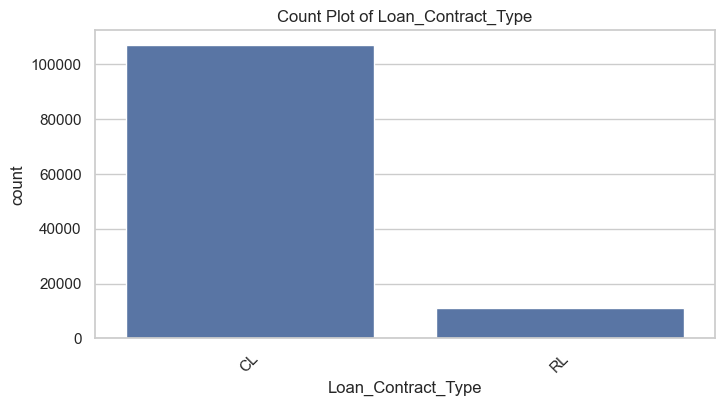

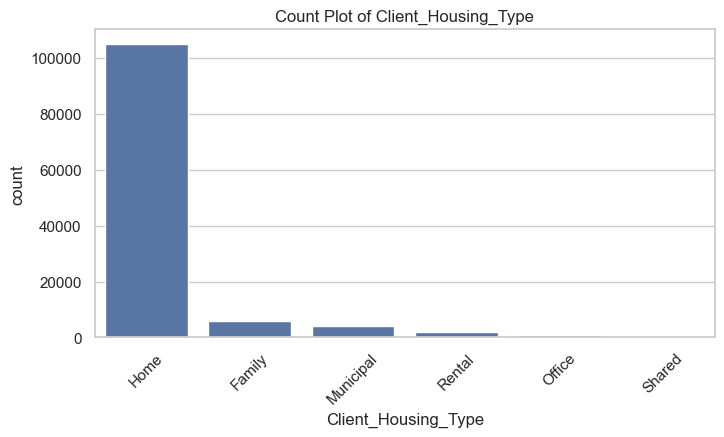

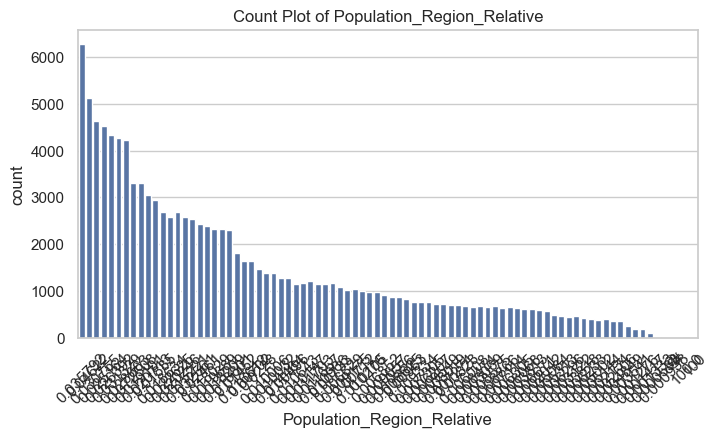

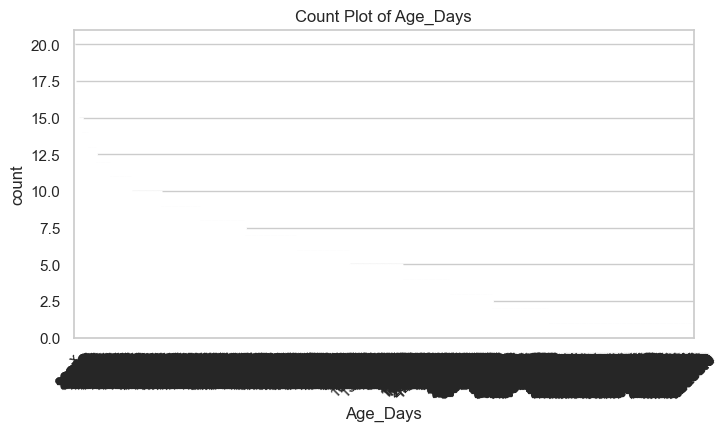

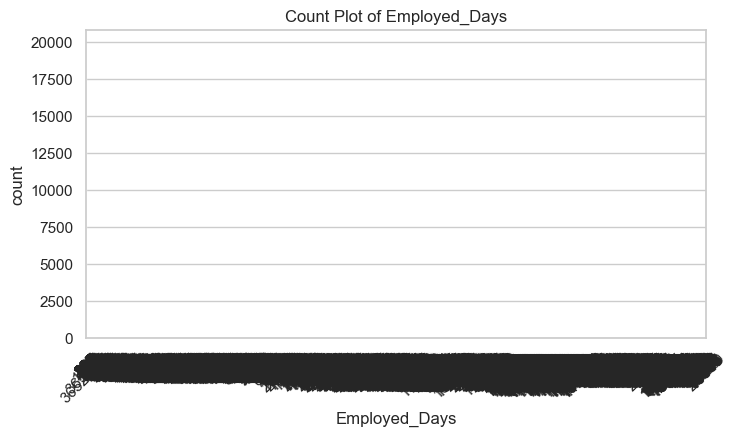

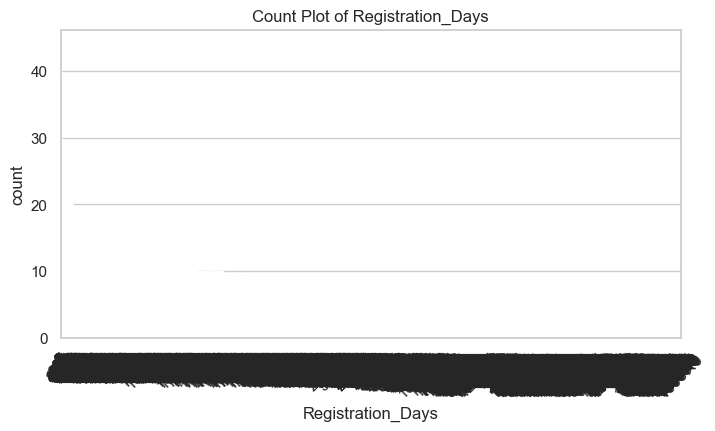

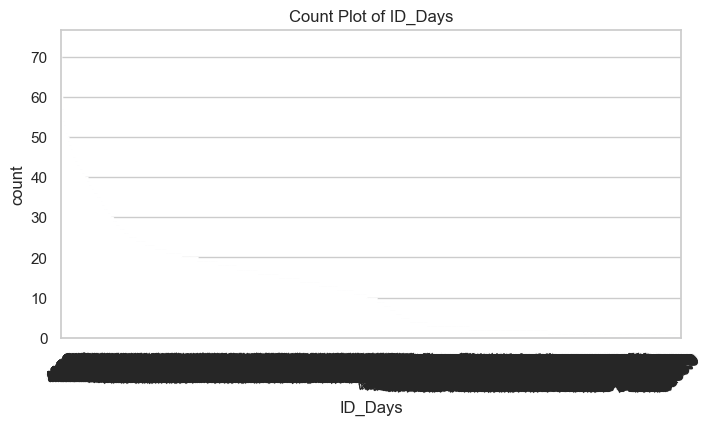

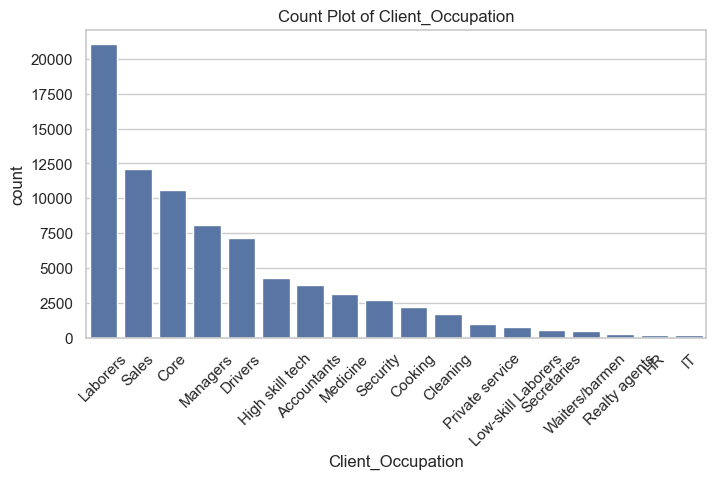

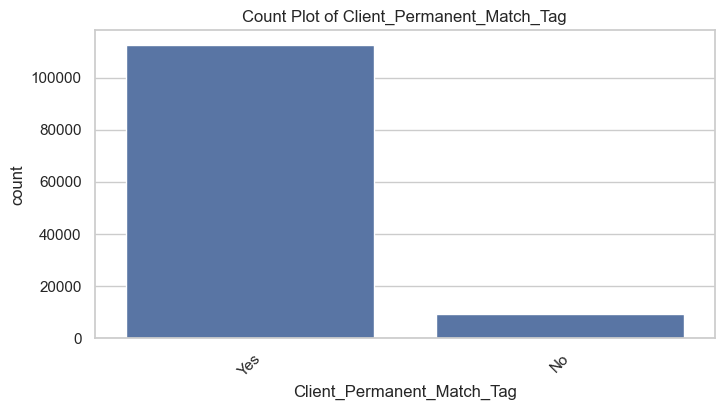

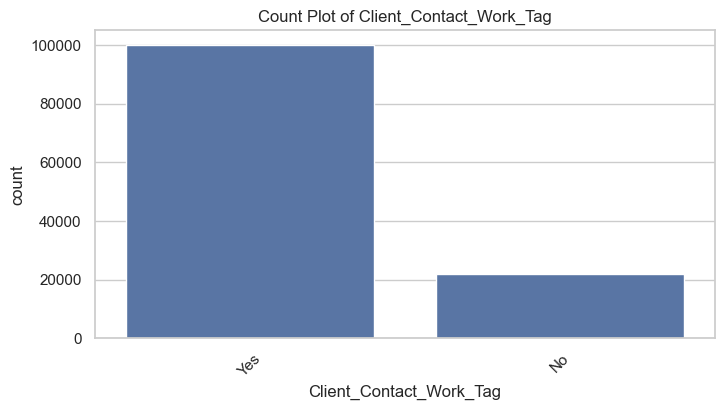

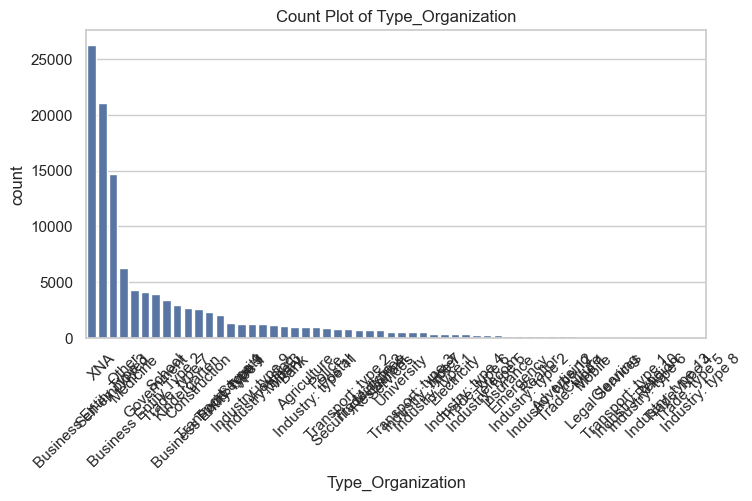

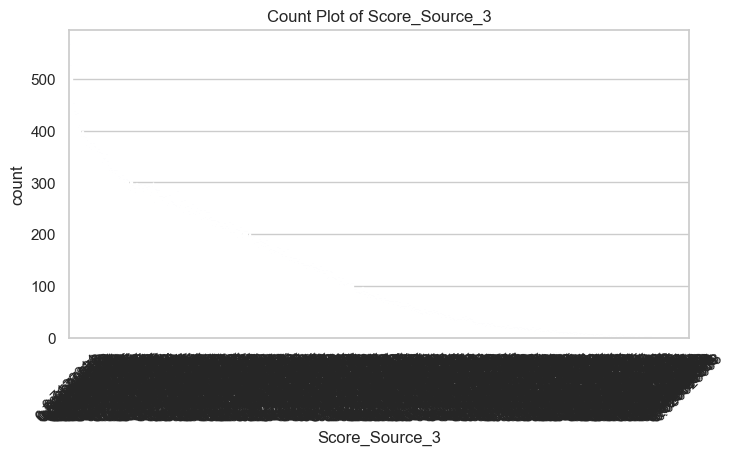

In [35]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Class Imbalance Check

In [ ]:
target_col = 'Default'  # Change if your target column has a different name
if target_col in df.columns:
    print("Class distribution in target variable:")
    print(df[target_col].value_counts(normalize=True))

# Feature Importance (Preparation)

## Next Steps: Feature Importance

## 8. Correlation Analysis

Compute and visualize the correlation matrix for numerical features using a heatmap.

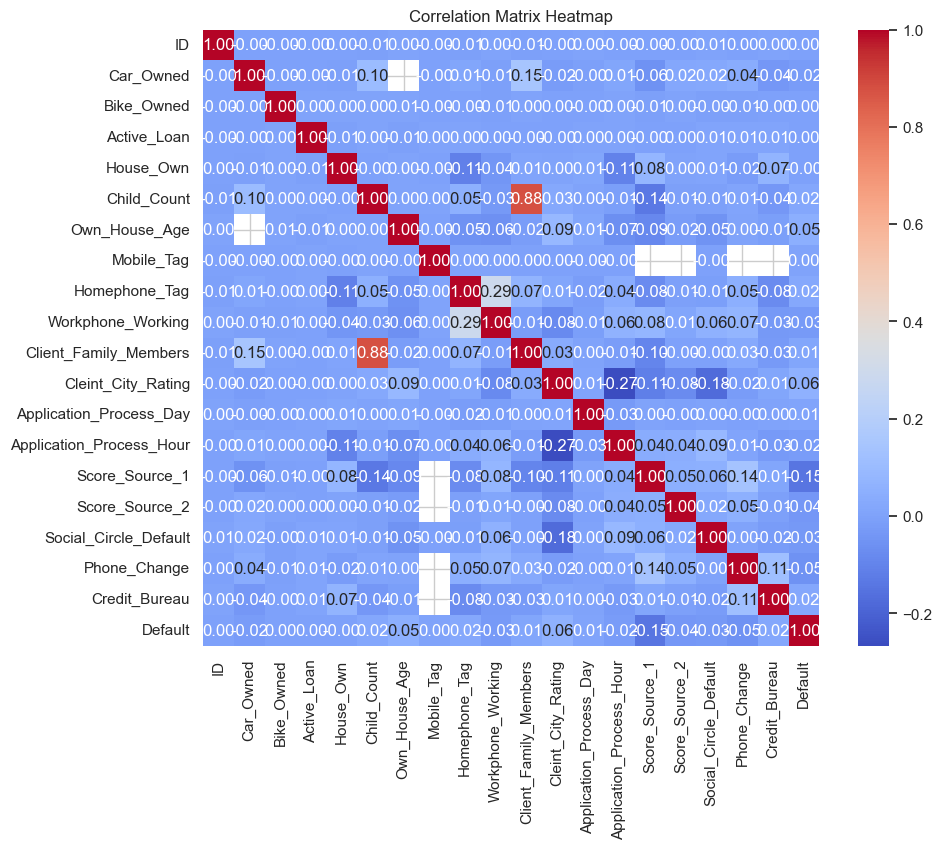

In [36]:
# Correlation matrix
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

## 9. Explore Target Variable Distribution

Visualize the distribution of the target variable. Replace `'target'` with your actual target column name.

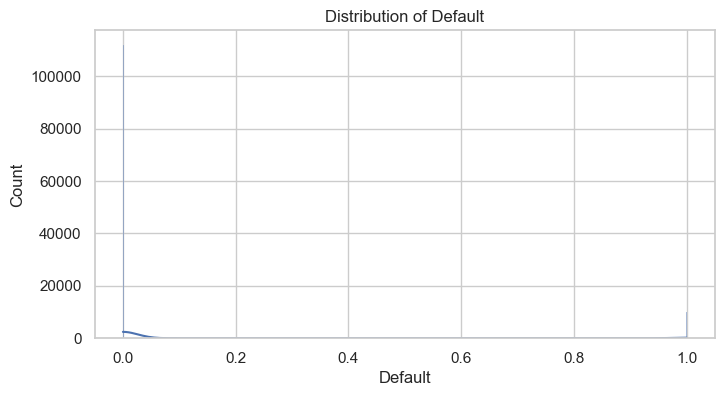

In [39]:
target_col = 'Default'  # Use the actual target column name

if target_col in df.columns:
    if df[target_col].dtype in [np.float64, np.int64]:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[target_col], kde=True)
        plt.title(f'Distribution of {target_col}')
        plt.show()
    else:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=target_col, order=df[target_col].value_counts().index)
        plt.title(f'Count Plot of {target_col}')
        plt.show()
else:
    print(f"Column '{target_col}' not found in the dataset.")

## 10. Explore Relationships Between Features and Target

Use scatter plots, boxplots, or groupby analysis to explore how features relate to the target variable.

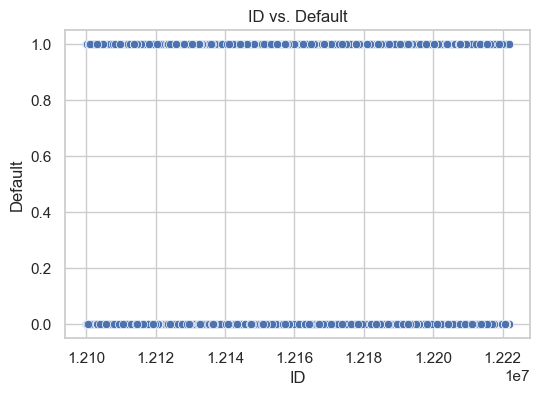

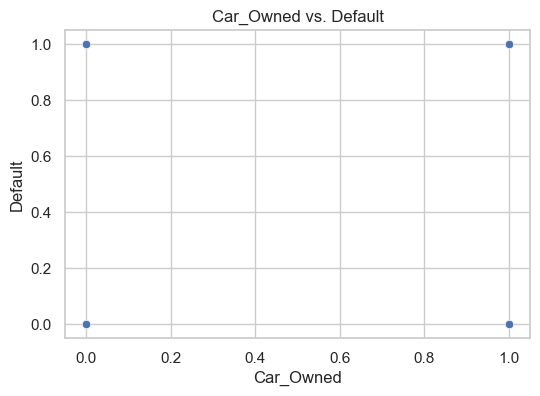

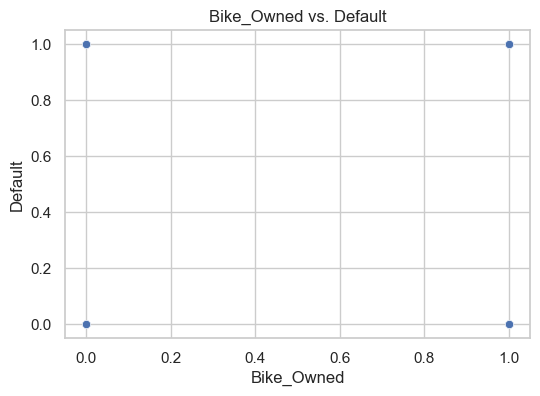

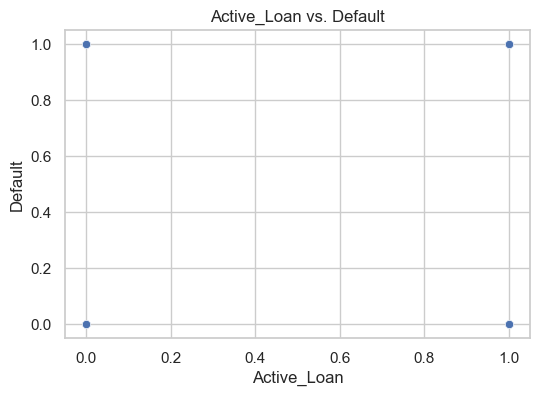

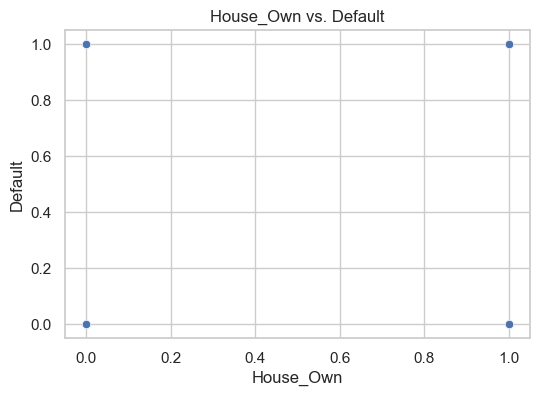

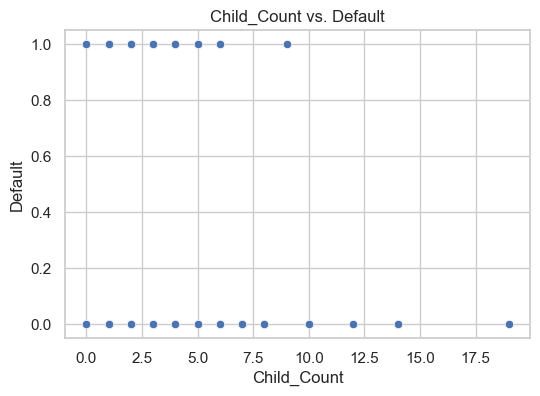

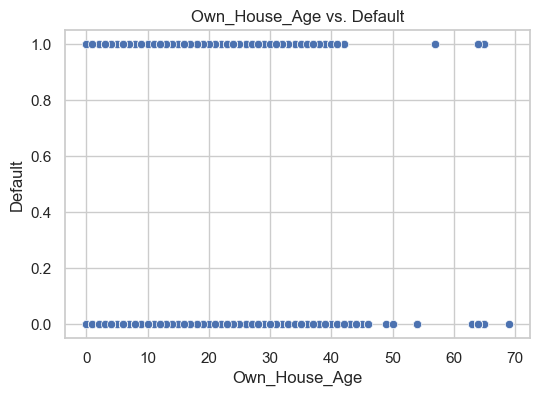

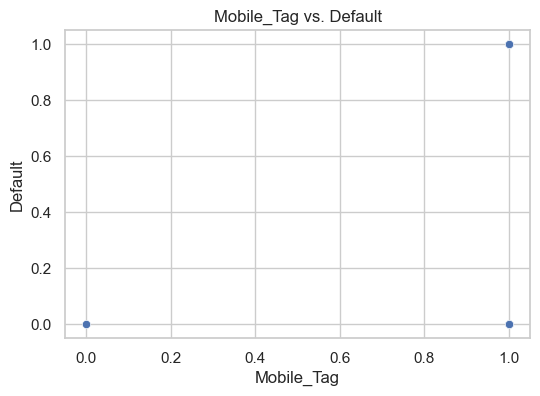

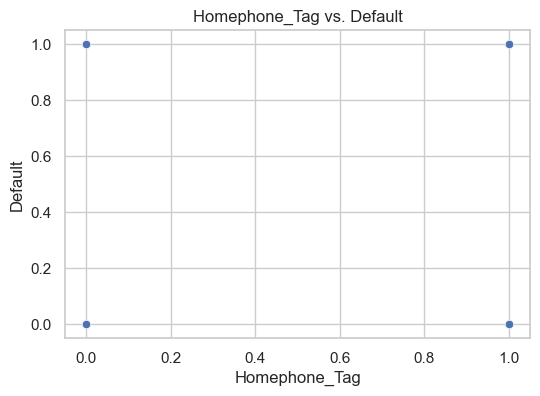

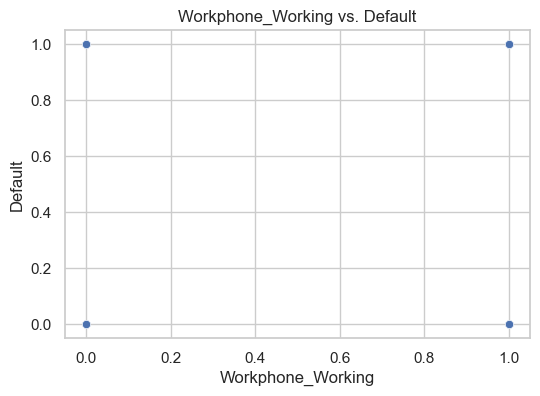

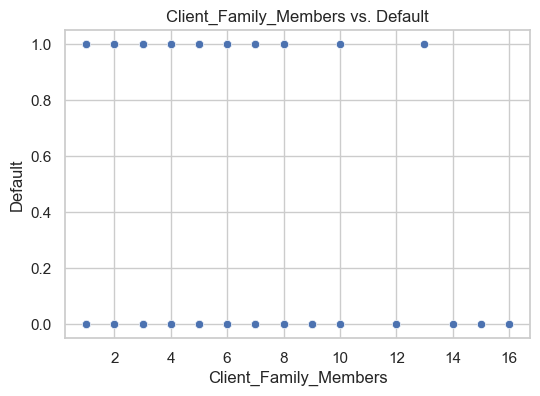

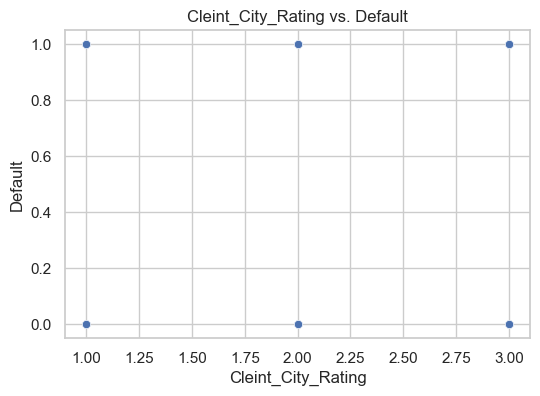

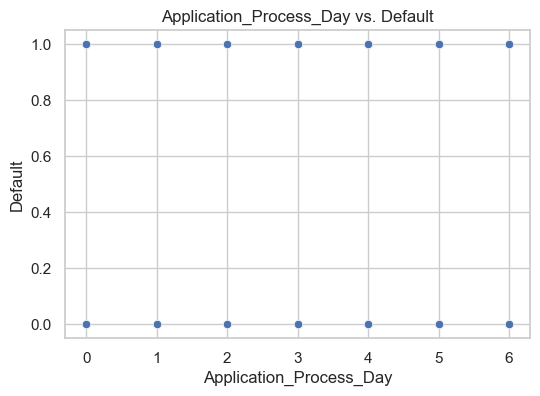

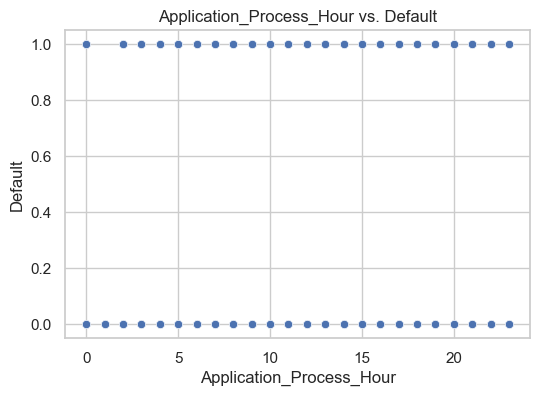

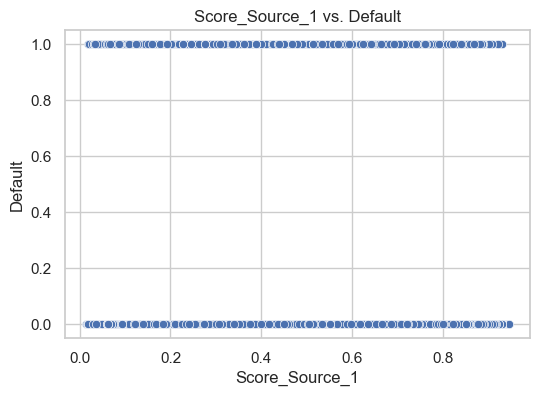

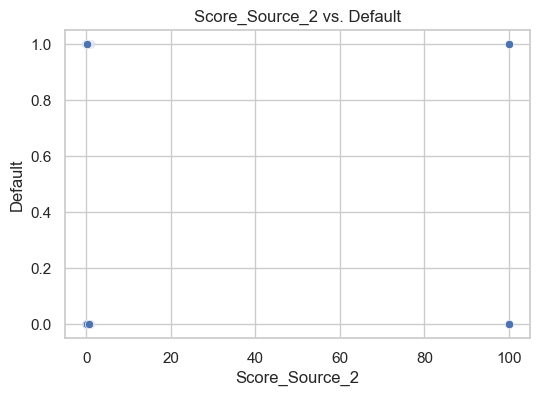

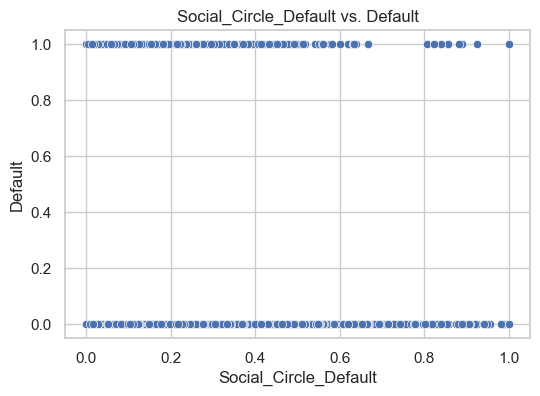

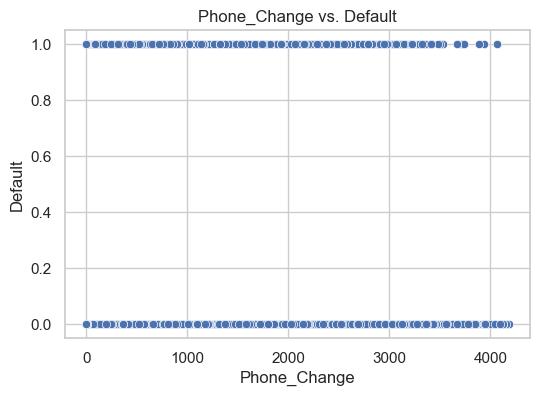

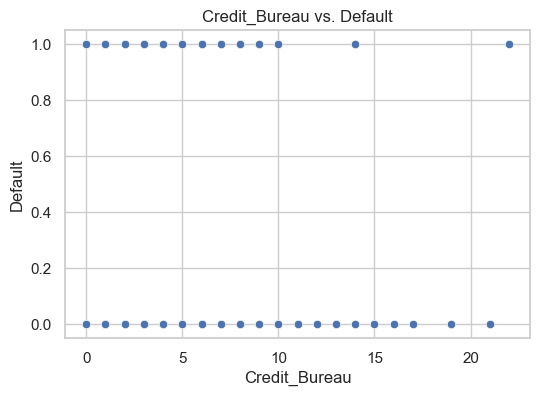

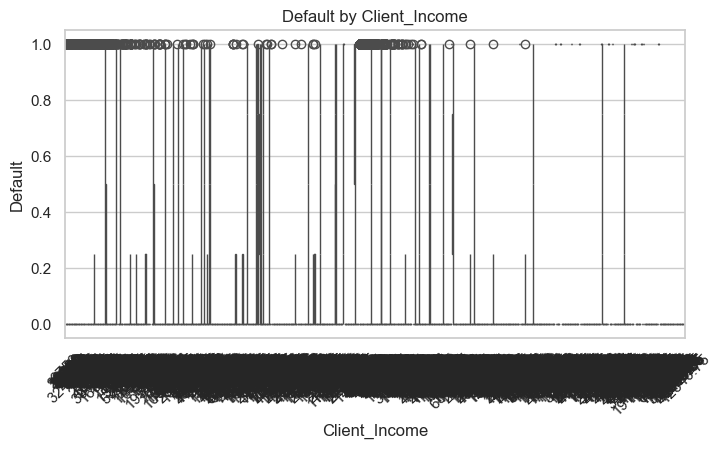

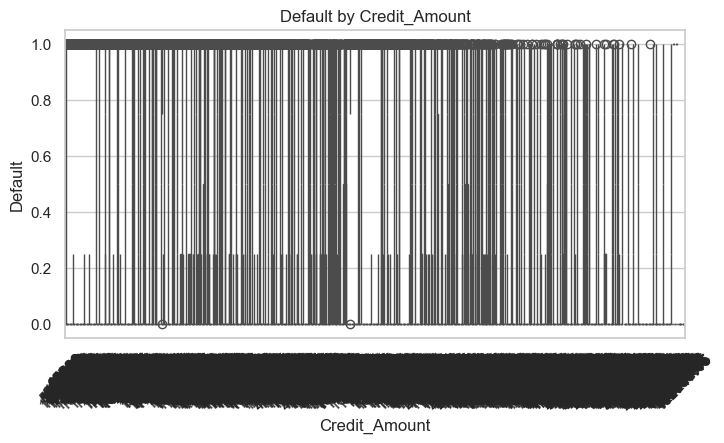

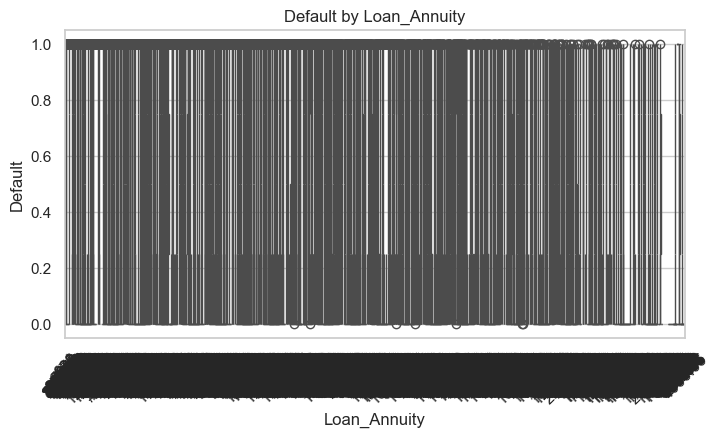

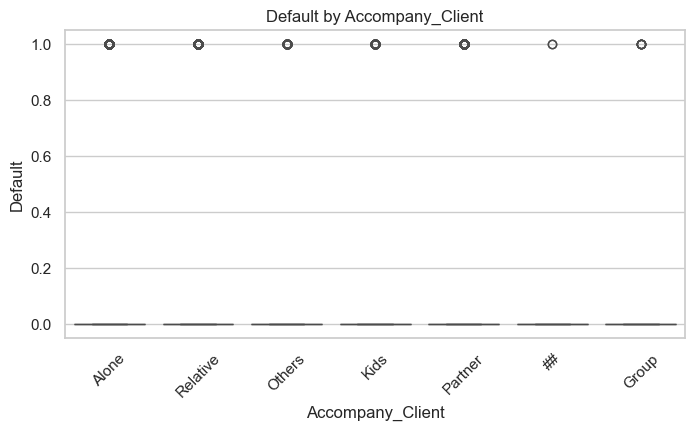

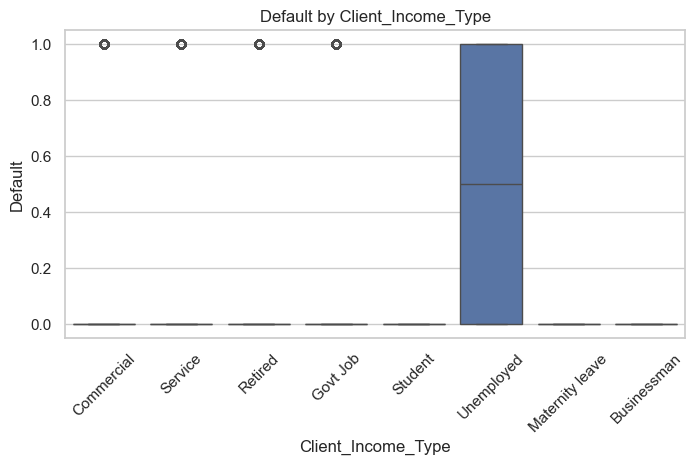

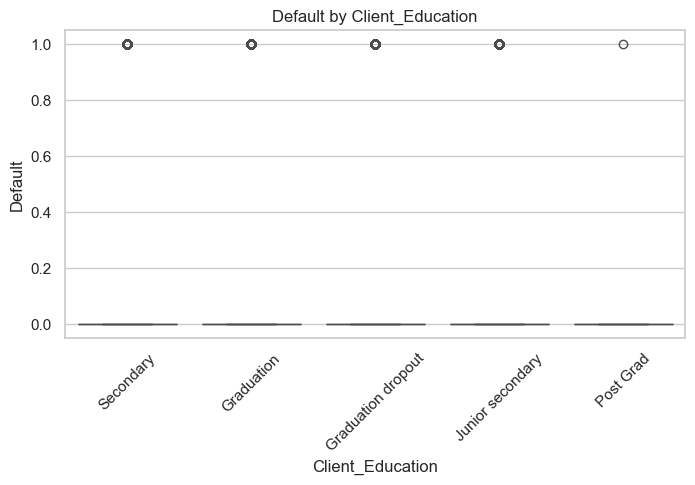

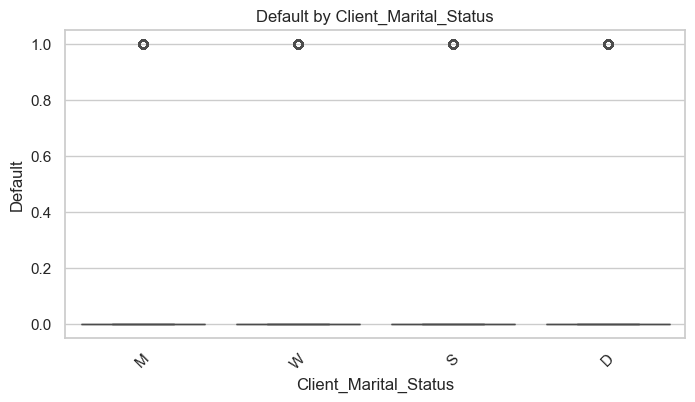

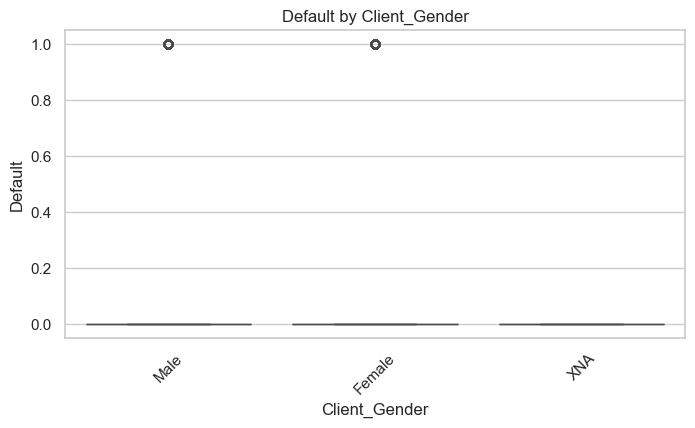

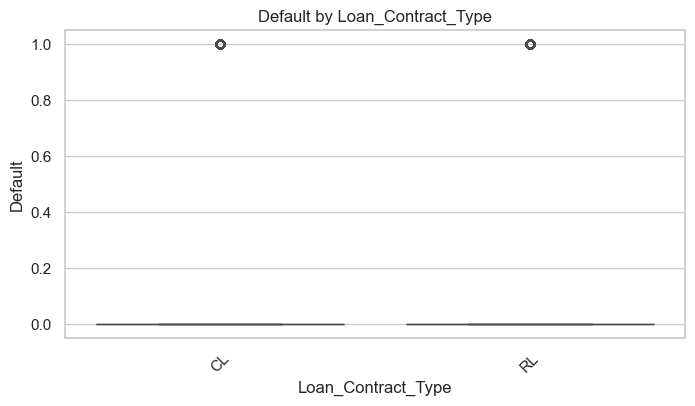

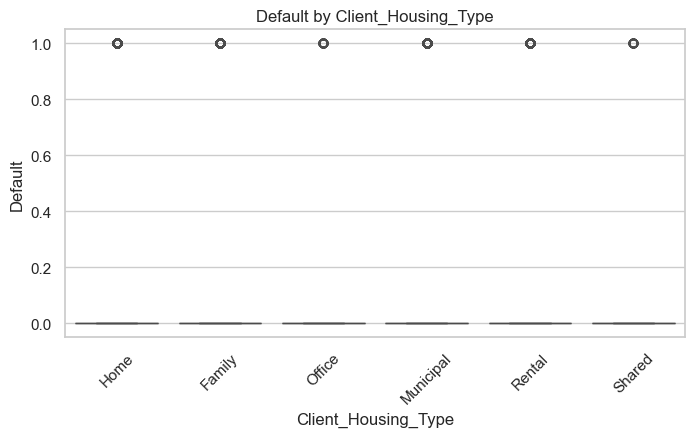

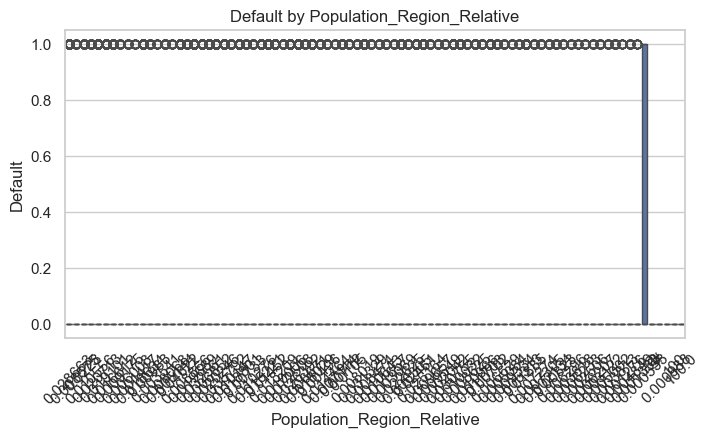

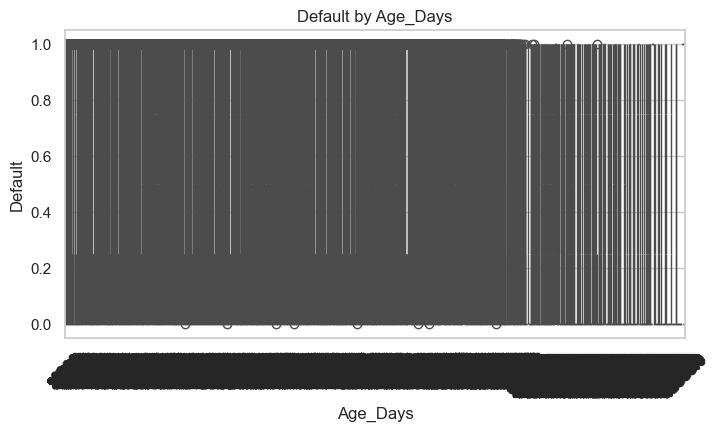

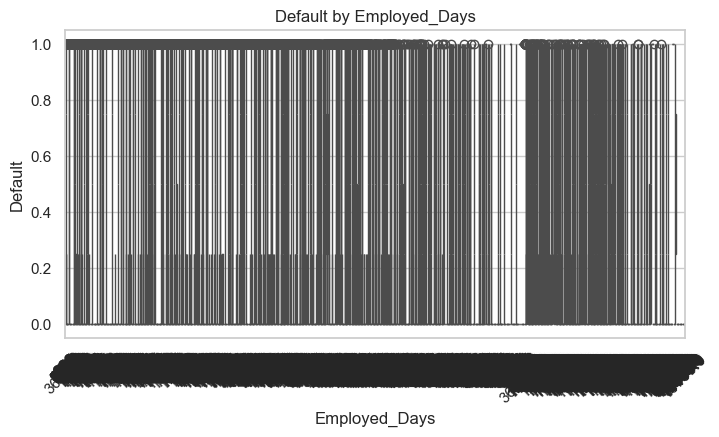

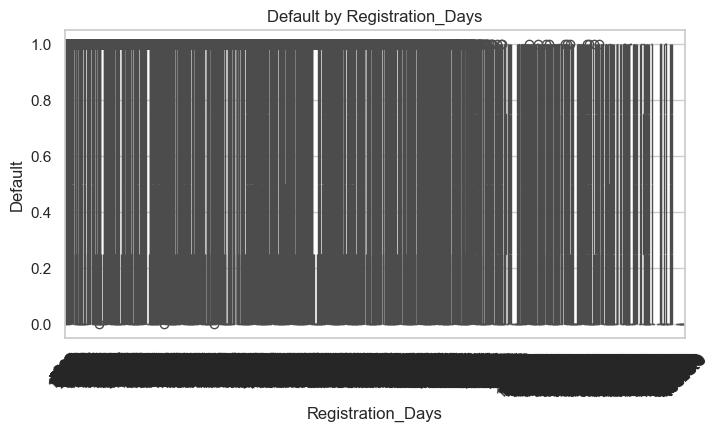

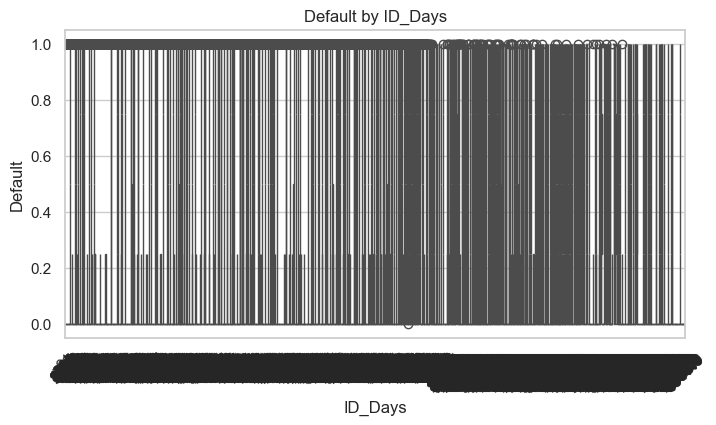

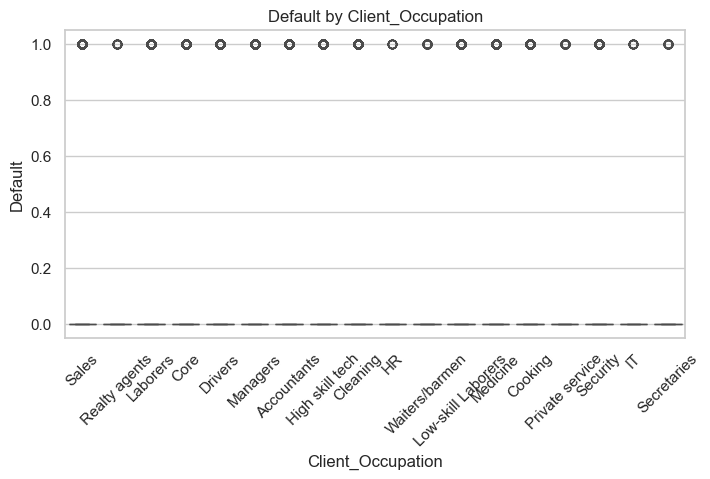

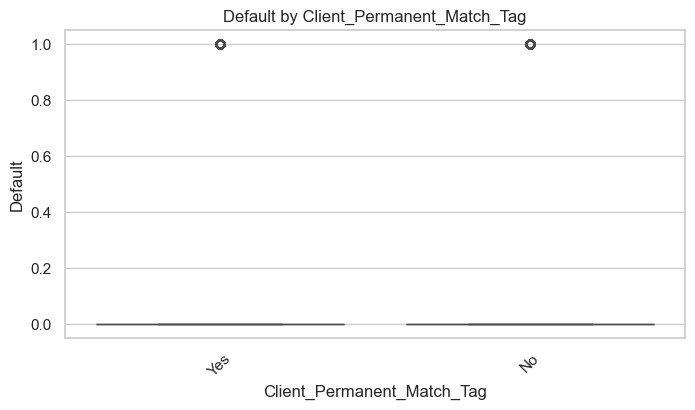

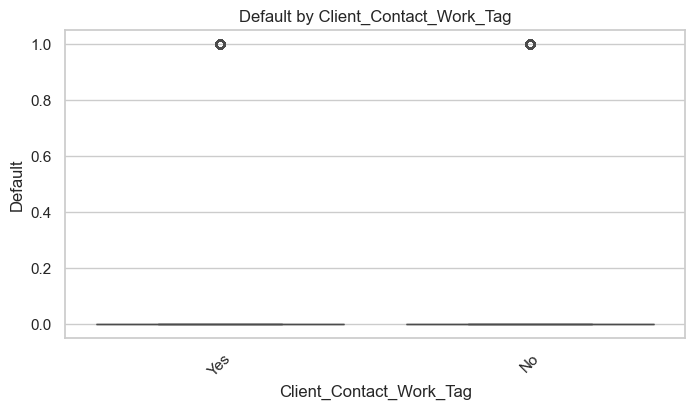

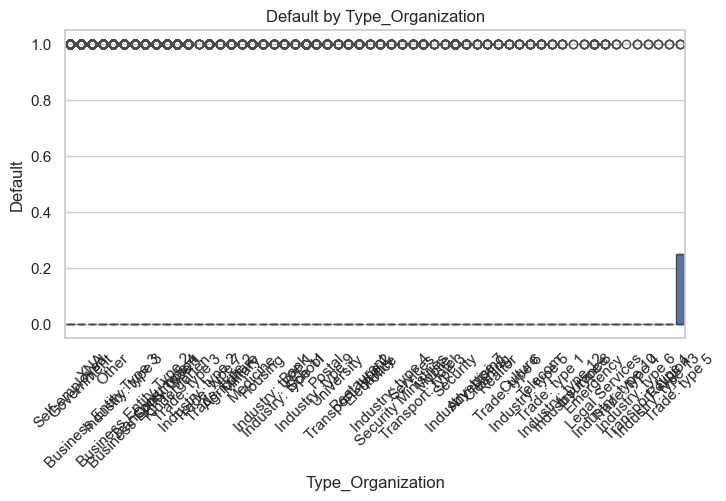

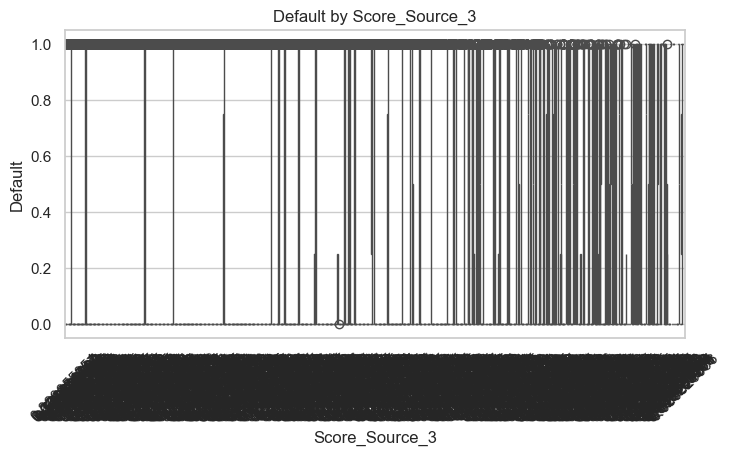

In [ ]:
# Example: Scatter plots for numerical features vs. target (if target is numerical)
if target_col in df.columns and df[target_col].dtype in [np.float64, np.int64]:
    for col in numerical_cols:
        if col != target_col:
            plt.figure(figsize=(6, 4))
            sns.scatterplot(data=df, x=col, y=target_col)
            plt.title(f'{col} vs. {target_col}')
            plt.show()

# Example: Boxplots for categorical features vs. target (if target is numerical)
if target_col in df.columns and df[target_col].dtype in [np.float64, np.int64]:
    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, x=col, y=target_col)
        plt.title(f'{target_col} by {col}')
        plt.xticks(rotation=45)
        plt.show()

# Example: Groupby analysis for categorical target
if target_col in df.columns and df[target_col].dtype == 'object':
    for col in numerical_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, x=target_col, y=col)
        plt.title(f'{col} by {target_col}')
        plt.show()

# Check for missing values

In [ ]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Visualize missing values

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# --- NEW: Handle missing values ---

In [ ]:
print("Missing values before imputation:")
print(df.isnull().sum())
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in [np.float64, np.int64]:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)
print("Missing values after imputation:")
print(df.isnull().sum())

# --- NEW: Outlier detection using IQR ---

In [ ]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
print("Outlier counts per numerical column:")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"{col}: {outliers} outliers")

# --- NEW: Class imbalance check ---
target_col = 'Default'  # Use the actual target column name
if target_col in df.columns:
    print("Class distribution in target variable:")
    print(df[target_col].value_counts(normalize=True))